<a href="https://colab.research.google.com/github/Abdellatif-Elfeke/Investigate-a-Dataset/blob/main/investigate_a_dataset_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

>● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

>● ‘Neighborhood’ indicates the
location of the hospital.

>● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

>● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up


In [ ]:
# import statements for all of the packages that you plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
url = 'https://raw.githubusercontent.com/Abdellatif-Elfeke/Investigate-a-Dataset/main/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(url)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#exploring the shape of data
df.shape

(110527, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
#check for dublications
df.duplicated().sum()

0

In [ ]:
#check the number of unique values
df['PatientId'].nunique()

62299

In [ ]:
#check the number of duplicated patient ids
df['PatientId'].duplicated().sum()

48228

In [ ]:
#check the number of duplicated patient ids and noshow
df.duplicated(['PatientId','No-show']).sum()

38710

There are 38710 patient ids have the same status of showing or no ,we will remove them in the cleaning data stage 

In [ ]:
#getting some information about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


mean age is 37 , max is 115 and min age is (-1) which is probably mistake will remove it only single value and i guess it was amistake and it would no affect our analysis about 50% of ages are between 18 and 55 years old 


In [ ]:
# identifying the row index of -1 value for the age
x = df.query('Age==-1')
x


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No




### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# remove the -1 value
df.drop(index=99832 , inplace = True )


In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
# correction of column names
df.rename(columns={'Hipertension':'Hypertension'},inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# removing duplicated ids with duplicated showing status 
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df.shape


(71816, 14)

In [ ]:
# removing unnecessory data 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1 , inplace=True)


In [ ]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. 

### Research Question 1 (General)

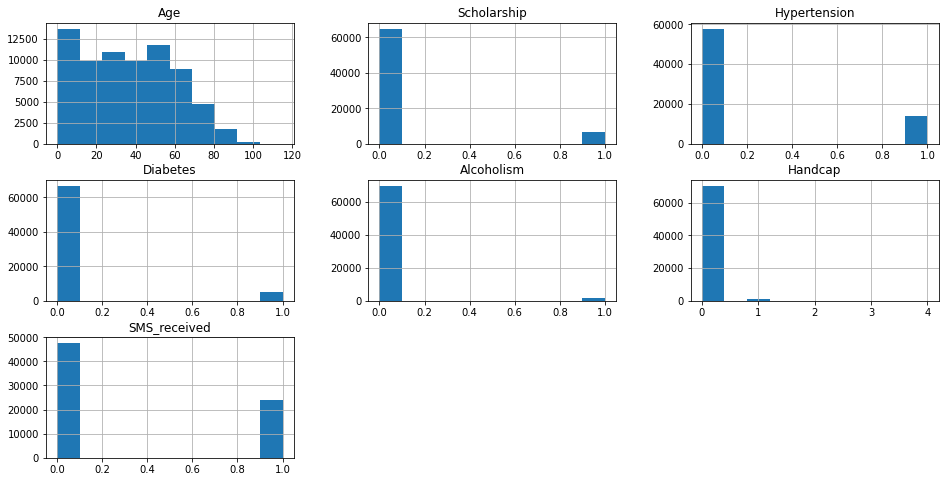

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16,8));

In [ ]:
# dividing the patient to 2 groups according to showing or not then exploring them
show = df['No-show']=='No'
no_show = df['No-show']=='Yes'
df[show].count(),df[no_show].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No-show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No-show          17663
 dtype: int64)

NO. of showed patient is 54153 3terms greater than non showed 17663

In [ ]:
df[show].mean(),df[no_show].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age for showed patients is 37 , no showed is 34 showed patient recieved sms less then no show patient which means have to revise our sms campaghine

### Analysis And Visualization

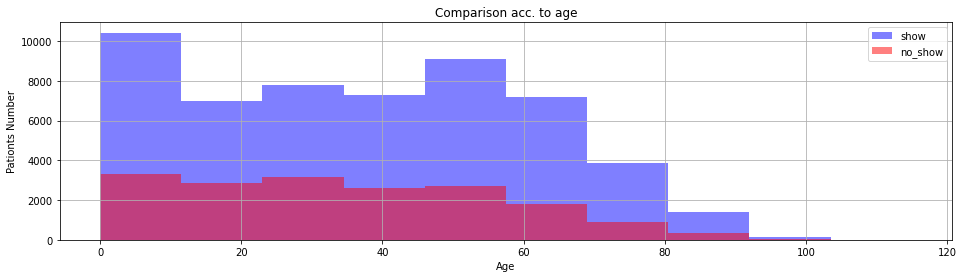

In [ ]:
# does age effect the attendance 
def attendance(df,col_name,attended,absent):
  plt.figure(figsize=[16,4])
  df[col_name][show].hist(alpha=0.5 ,bins=10, color='blue', label = 'show')
  df[col_name][no_show].hist(alpha=0.5 ,bins=10, color='red' , label = 'no_show')
  plt.legend()
  plt.title('Comparison acc. to age')
  plt.xlabel('Age')
  plt.ylabel('Pationts Number');
attendance(df,'Age',show,no_show)

Ages from 0 : 8 are the most showing then 45 : 55 and the least attending are above 65 years old.

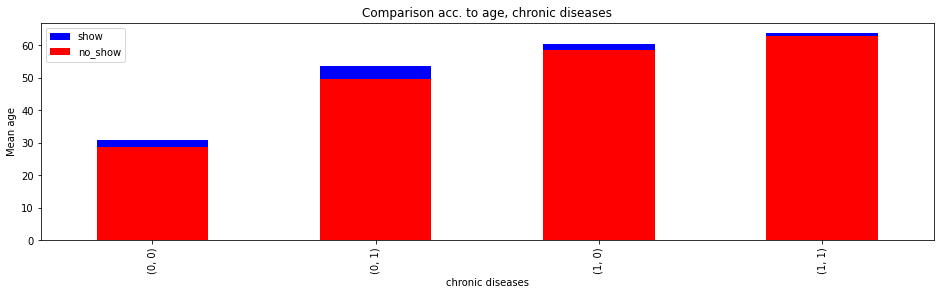

In [ ]:
# does age and chronic diseases effect the attendance together
plt.figure(figsize=[16,4])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color ='blue' , label = 'show')
df[no_show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color ='red' , label = 'no_show')
plt.legend();
plt.title('Comparison acc. to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');

In [ ]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[no_show].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

mean age of non chronic diseases showing parents is 30 and non showing is 28 mean age of Hypertension Diabetes showing parents is 64 and non showing is 36 mean between age and chronic diseases

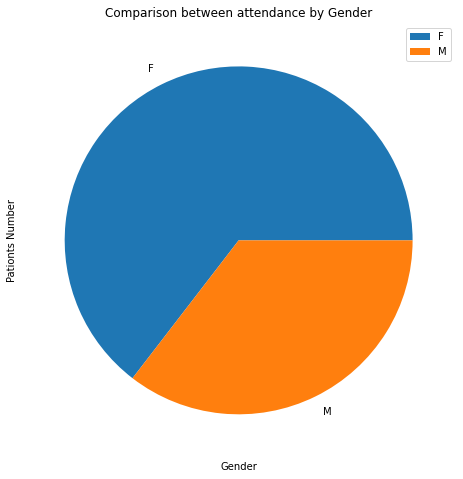

In [ ]:
from locale import normalize
# what is the percentage of gender
def attendance(df,col_name,attended,absent):

  plt.figure(figsize=[16,8])
  df[col_name][show].value_counts(normalize= True).plot(kind = 'pie' , label = 'show')
  plt.legend()
  plt.title('Comparison between attendance by Gender')
  plt.xlabel('Gender')
  plt.ylabel('Pationts Number')
attendance(df,'Gender',show,no_show)

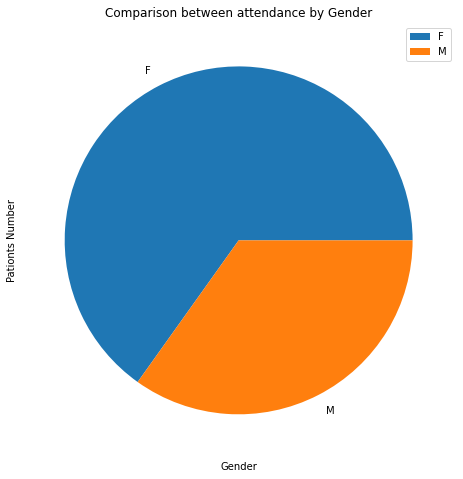

In [ ]:
from locale import normalize
# what is the percentage of gender
def attendance(df,col_name,attended,absent):

  plt.figure(figsize=[16,8])
  df[col_name][no_show].value_counts(normalize= True).plot(kind = 'pie' , label = 'show')
  plt.legend()
  plt.title('Comparison between attendance by Gender')
  plt.xlabel('Gender')
  plt.ylabel('Pationts Number')
attendance(df,'Gender',show,no_show)

gender has no clear effect on attendance

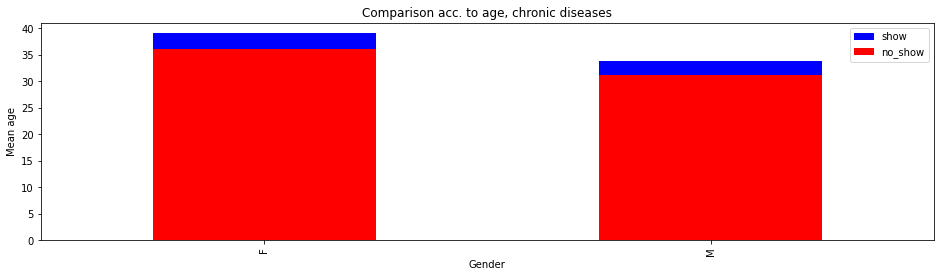

In [ ]:
# does age and chronic gender effect the attendance together
plt.figure(figsize=[16,4])
df[show].groupby('Gender').Age.mean().plot(kind='bar',color ='blue' , label = 'show')
df[no_show].groupby('Gender').Age.mean().plot(kind='bar',color ='red' , label = 'no_show')
plt.legend();
plt.title('Comparison acc. to age, chronic diseases')
plt.xlabel('Gender')
plt.ylabel('Mean age');

There is no correlation between age and Gender 

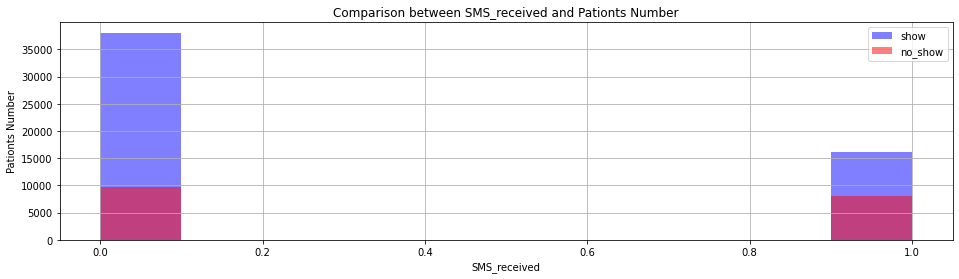

In [ ]:
# does receiving SMS effect the attendance 
def attendance(df,col_name,attended,absent):

  plt.figure(figsize=[16,4])
  df[col_name][show].hist(alpha=0.5 , color = 'blue',label = 'show')
  df[col_name][no_show].hist(alpha=0.5 ,color ='red', label = 'no_show')
  plt.legend()
  plt.title('Comparison between SMS_received and Pationts Number')
  plt.xlabel('SMS_received')
  plt.ylabel('Pationts Number')
attendance(df,'SMS_received',show,no_show)

Number of showing patient without receiving sms is greater than showing patient with reciving sms which means that we need to revisit our sms campagin

Text(0, 0.5, 'Pationts Number')

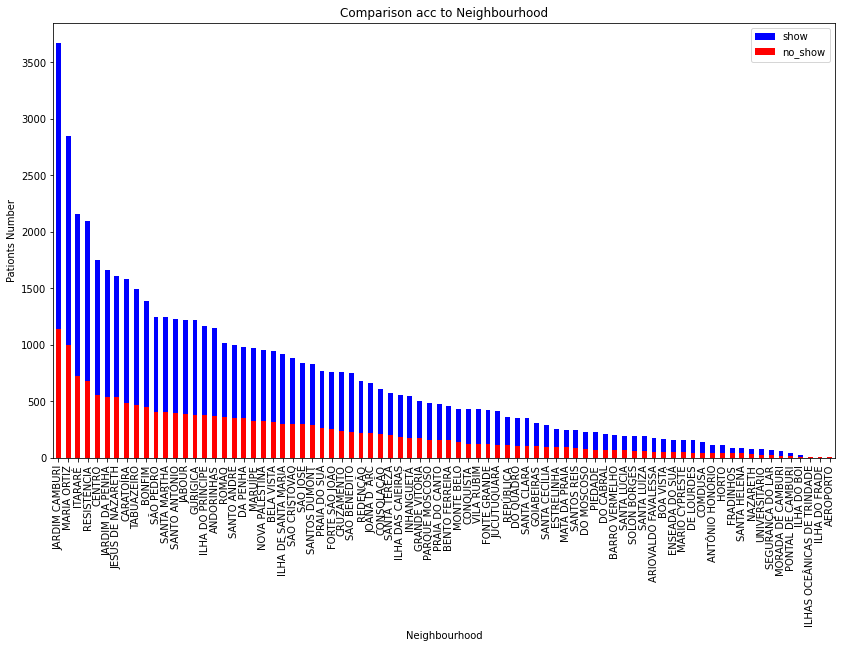

In [ ]:
# does Neighbourhood effect the attendance 
plt.figure(figsize=[14,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color ='blue' , label = 'show')
df.Neighbourhood[no_show].value_counts().plot(kind='bar',color ='red' , label = 'no_show')
plt.legend()
plt.title('Comparison acc to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Pationts Number')

Neighbourhood has a great effect on attendance or not 

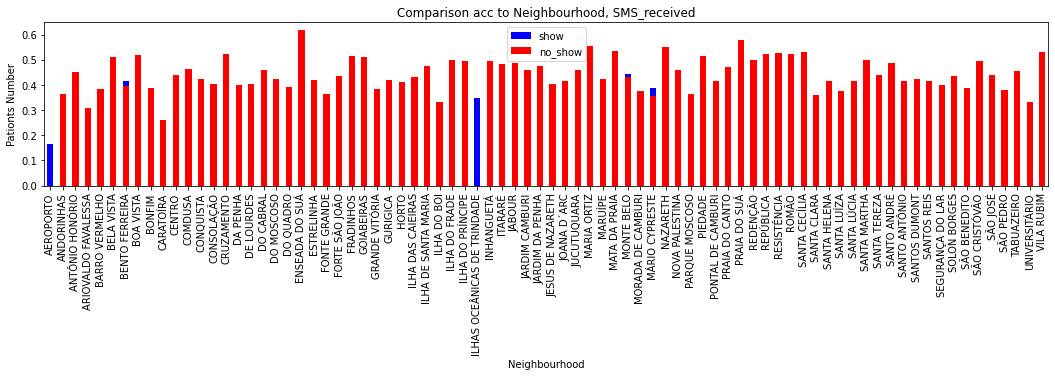

In [ ]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind ='bar'  , label = 'show' , color='blue')
df[no_show].groupby('Neighbourhood').SMS_received.mean().plot(kind ='bar' , label = 'no_show' , color='red')
plt.legend()
plt.title('Comparison acc to Neighbourhood, SMS_received')
plt.xlabel('Neighbourhood')
plt.ylabel('Pationts Number');

SMS has response on 5 Neighbourhood 

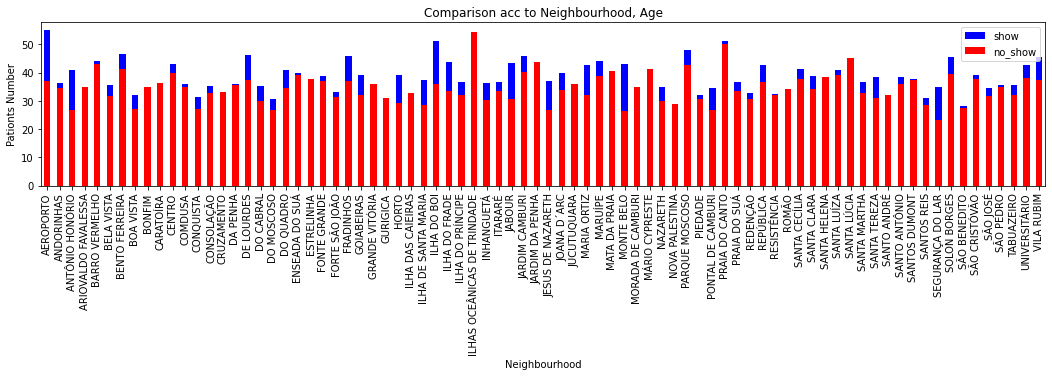

In [ ]:
plt.figure(figsize=[18,3])
df[show].groupby('Neighbourhood').Age.mean().plot(kind ='bar'  , label = 'show' , color='blue')
df[no_show].groupby('Neighbourhood').Age.mean().plot(kind ='bar' , label = 'no_show' , color='red')
plt.legend()
plt.title('Comparison acc to Neighbourhood, Age')
plt.xlabel('Neighbourhood')
plt.ylabel('Pationts Number');

<a id='conclusions'></a>
## Conclusions

>  Finally, Neighbourhood has a great effect on attendance or not.

> Number of showing patients from specific  Neighbourhood affected by receiving SMS and Ages.

> Age  from 0 : 8 are the most showing then 45 : 55 and the least attending are above 65 years old.

> Number of showing patient without receiving sms is greater than showing patient with reciving sms which means that we need to revisit our sms campagin